<a href="https://colab.research.google.com/github/dcepeda2/Cumulos-abiertos/blob/main/ASN122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importas Skew desde Scipy:
from glob import glob
import pandas as pd
import os
import numpy as np
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import skew

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
directories = glob('/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/10_10000') + glob('/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/3_10000') + glob('/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/7_10000')
stars_dataframes = []
for directory in directories:
    print(directory)
    files_path = glob(directory + '/*.txt')
    for file_path in files_path:
        print(file_path)
        df = pd.read_csv(file_path, sep=r'\s+', header=None, names=['MJD', 'Magnitude', 'Error'])
        file_name = os.path.splitext(os.path.basename(file_path))[0]
        df.attrs['ID_star'] = file_name
        stars_dataframes.append(df)

Se han truncado las últimas 5000 líneas del flujo de salida.
/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/7_10000/D2b27967227.txt
/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/7_10000/D2b27967240.txt
/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/7_10000/D2b27967252.txt
/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/7_10000/D2b27967255.txt
/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/7_10000/D2b2796725.txt
/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/7_10000/D2b27967241.txt
/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/7_10000/D2b27967257.txt
/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/7_10000/D2b27967256.txt
/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/7_10000/D2b27967245.txt
/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/7_10000/D2b27967254.txt
/content/drive/MyDrive/Cumulos abiertos/Estrellas variables/7_10000/D2b27967243.txt
/content/drive/M

In [4]:
for df in stars_dataframes:
    df.sort_values('MJD', inplace=True)

In [5]:
len(stars_dataframes)

30000

In [6]:
def plot_sigma_vs_average(*dataframes, degree=2, curve_dilatator=1):
    averages = []
    sigmas = []
    ids = []

    # Finding mean and standard deviation for each dataframes
    for df in dataframes:
        average = df['Magnitude'].mean()
        sigma = df['Magnitude'].std()
        averages.append(average)
        sigmas.append(sigma)
        ids.append(df.attrs['ID_star'])

    # Conversion to np arrays for the polyfit
    averages_array = np.array(averages)
    sigmas_array = np.array(sigmas)
    ids_array = np.array(ids)

    # Polynomial fitting
    coefs = np.polyfit(averages_array, sigmas_array, degree)
    polynomial = np.poly1d(coefs)

    # We multiply by a coefficient to freely move the curve as we want
    y_pred = polynomial(averages_array) * curve_dilatator

    # Plotting all the points
    plt.figure(figsize=(10, 6))
    plt.scatter(averages_array, sigmas_array, color='green', edgecolor='k', s=50, label='Data Points')

    # We determine the points above the curve that fits the data
    above_curve = sigmas_array > y_pred
    ids_above_curve = ids_array[above_curve]
    plt.scatter(averages_array[above_curve], sigmas_array[above_curve], color='red', s=70, label='Candidates above fit')
    print(sigmas_array[above_curve].shape[0])

    # Plotting the curve that fits the data
    x_line = np.linspace(min(averages_array), max(averages_array), 1000)
    y_line = polynomial(x_line) * curve_dilatator
    plt.plot(x_line, y_line, color='blue', label=f'Polynomial fit')
    plt.plot(x_line, y_line/curve_dilatator, color='lightgreen', linestyle='dashed', label=f'Polynomial fit')

    plt.title('$\sigma_{\mathrm{magnitude}}$ = f(Mean Magnitude)')
    plt.xlabel('Mean magnitude')
    plt.ylabel('$\sigma_{\mathrm{magnitude}}$')
    plt.text(plt.xlim()[0] + (plt.xlim()[1] - plt.xlim()[0]) * 0.50, plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.70, f'Number of candidates : {len(ids_above_curve)}', fontsize=12, ha='center')
    plt.legend()
    plt.grid(True)
    plt.show()

    return ids_above_curve

In [7]:
def plot_amplitude_vs_average(*dataframes, degree=2, curve_dilatator=1):
    averages = []
    amplitudes = []
    ids = []

    for df in dataframes:
        average = df['Magnitude'].mean()
        amplitude = np.abs(df['Magnitude'].max() - df['Magnitude'].min())
        averages.append(average)
        amplitudes.append(amplitude)
        ids.append(df.attrs['ID_star'])

    averages_array = np.array(averages)
    amplitudes_array = np.array(amplitudes)
    ids_array = np.array(ids)

    coefs = np.polyfit(averages_array, amplitudes_array, degree)
    polynomial = np.poly1d(coefs)

    y_pred = polynomial(averages_array) * curve_dilatator

    plt.figure(figsize=(10, 6))
    plt.scatter(averages_array, amplitudes_array, color='green', edgecolor='k', s=50, label='Data Points')

    above_curve = amplitudes_array > y_pred
    ids_above_curve = ids_array[above_curve]
    plt.scatter(averages_array[above_curve], amplitudes_array[above_curve], color='red', s=70, label='Candidates above fit')
    print(amplitudes_array[above_curve].shape[0])

    x_line = np.linspace(min(averages_array), max(averages_array), 1000)
    y_line = polynomial(x_line) * curve_dilatator
    plt.plot(x_line, y_line, color='blue', label=f'Polynomial fit')
    plt.plot(x_line, y_line/curve_dilatator, color='lightgreen', linestyle='dashed', label=f'Polynomial fit')

    plt.title('Amplitude = f(Mean_Magnitude)')
    plt.xlabel('Mean magnitude')
    plt.ylabel('Amplitude$')
    plt.text(plt.xlim()[0] + (plt.xlim()[1] - plt.xlim()[0]) * 0.50, plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.70, f'Number of candidates : {len(ids_above_curve)}', fontsize=12, ha='center')
    plt.legend()
    plt.grid(True)
    plt.show()

    return ids_above_curve

272


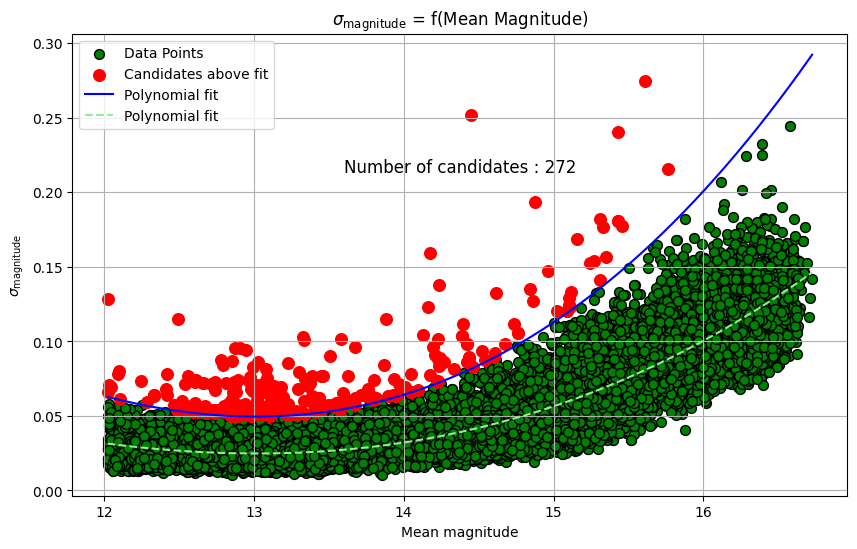

In [8]:
ids_sigmas = plot_sigma_vs_average(*stars_dataframes, degree=3, curve_dilatator=2.00)

231


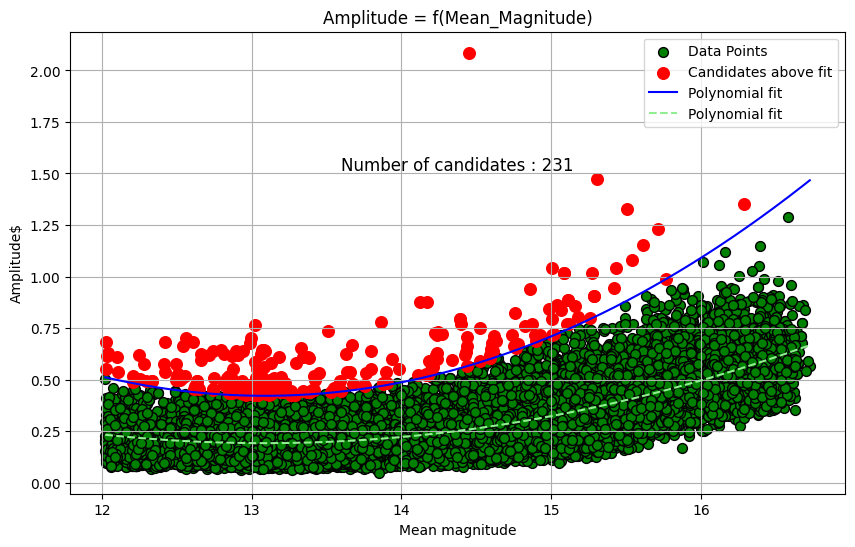

In [9]:
ids_amplitudes = plot_amplitude_vs_average(*stars_dataframes, degree=3, curve_dilatator=2.2)

In [10]:
all_ids = np.union1d(ids_amplitudes, ids_sigmas)

In [11]:
candidates_dataframes = []

for id in all_ids:
    for df in stars_dataframes:
        if df.attrs['ID_star'] == id:
            candidates_dataframes.append(df)

len(candidates_dataframes)

367

In [12]:
def calculate_frequency(star_dataframe, frequency_threshold=0.01):
    times = star_dataframe['MJD'].values
    magnitudes = star_dataframe['Magnitude'].values
    errors = star_dataframe['Error'].values

    # Calculating the Lomb-Scargle periodogram
    frequency, power = LombScargle(times, magnitudes, errors).autopower()

    # Filter to keep only the frequency > to the frequency threshold (for example if we want to cut the low frequency
    mask = frequency > frequency_threshold
    filtered_frequency = frequency[mask]
    filtered_power = power[mask]

    best_frequency = filtered_frequency[np.argmax(filtered_power)]
    best_period = 1 / best_frequency
    max_power = filtered_power.max()
    fap = LombScargle(times, magnitudes, errors).false_alarm_probability(max_power)

    return filtered_frequency, filtered_power, best_frequency, best_period, fap

In [13]:
def plot_lombscargle_and_phase_diagram(star_dataframe, frequency_threshold=0.01, plot_buffer=0.1, n_phases=1):
    times = star_dataframe['MJD'].values
    magnitudes = star_dataframe['Magnitude'].values
    errors = star_dataframe['Error'].values

    # Calculating the Lomb-Scargle periodogram
    frequency, power, best_frequency, best_period, fap = calculate_frequency(star_dataframe, frequency_threshold)

    # Setting up subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Plotting the Lomb-Scargle Periodogram
    ax1.plot(frequency, power)
    ax1.set_xlabel('Frequency (1/day)')
    ax1.set_ylabel('Lomb-Scargle Power')

    # Plotting the Phase Diagram
    phase = (times % best_period) / best_period
    phase_full = np.concatenate([phase + i for i in range(n_phases)])  # Extend phase for n periods
    magnitudes_full = np.tile(magnitudes, n_phases)  # Repeat magnitudes for each phase

    sorted_indices = np.argsort(phase_full)
    magnitudes_sorted = magnitudes_full[sorted_indices]
    phase_sorted = phase_full[sorted_indices]

    # Adjusting y-axis for a bit of zoom-out
    min_mag, max_mag = np.min(magnitudes_sorted), np.max(magnitudes_sorted)
    range_mag = max_mag - min_mag

    ax2.scatter(phase_sorted, magnitudes_sorted, s=10, color='blue')
    ax2.set_xlabel('Phase')
    ax2.set_ylabel('Magnitude')
    ax2.set_xlim(0, n_phases)  # Set x limits to show multiple phases
    ax2.set_ylim(max_mag + plot_buffer * range_mag, min_mag - plot_buffer * range_mag)  # Zoom out
    ax2.invert_yaxis()  # Invert y-axis for typical astronomical magnitude plot

    # Adding text annotations
    ax2.text(plt.xlim()[0] + (plt.xlim()[1] - plt.xlim()[0]) * 0.20,
             plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.97,
             'Text1', fontsize=12, ha='center')

    ax2.text(plt.xlim()[0] + (plt.xlim()[1] - plt.xlim()[0]) * 0.60,
             plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.97,
             'Text2', fontsize=12, ha='center')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

    return best_frequency, best_period

In [14]:
most_probable_stars_dfs = []

for star_df in candidates_dataframes:
    copy = star_df.copy()
    times = copy['MJD'].values
    magnitudes = copy['Magnitude'].values
    errors = copy['Error'].values

    frequency, power, best_frequency, best_period, fap = calculate_frequency(star_df)

    # Estimate noise level as the median of the power spectrum
    noise_level = np.median(power)
    signal_to_noise_ratio = power.max() / noise_level

    copy.attrs['Frequency'] = best_frequency
    copy.attrs['Period'] = best_period
    copy.attrs['FAP'] = fap
    copy.attrs['S/N'] = signal_to_noise_ratio

    if fap < 0.05:  # Selecting stars with less than 5% chance of being false positives
        most_probable_stars_dfs.append(copy)

In [15]:
len(most_probable_stars_dfs)

13

In [16]:
most_probable_stars_dfs = sorted(most_probable_stars_dfs, key=lambda x: x.attrs['S/N'], reverse=True)

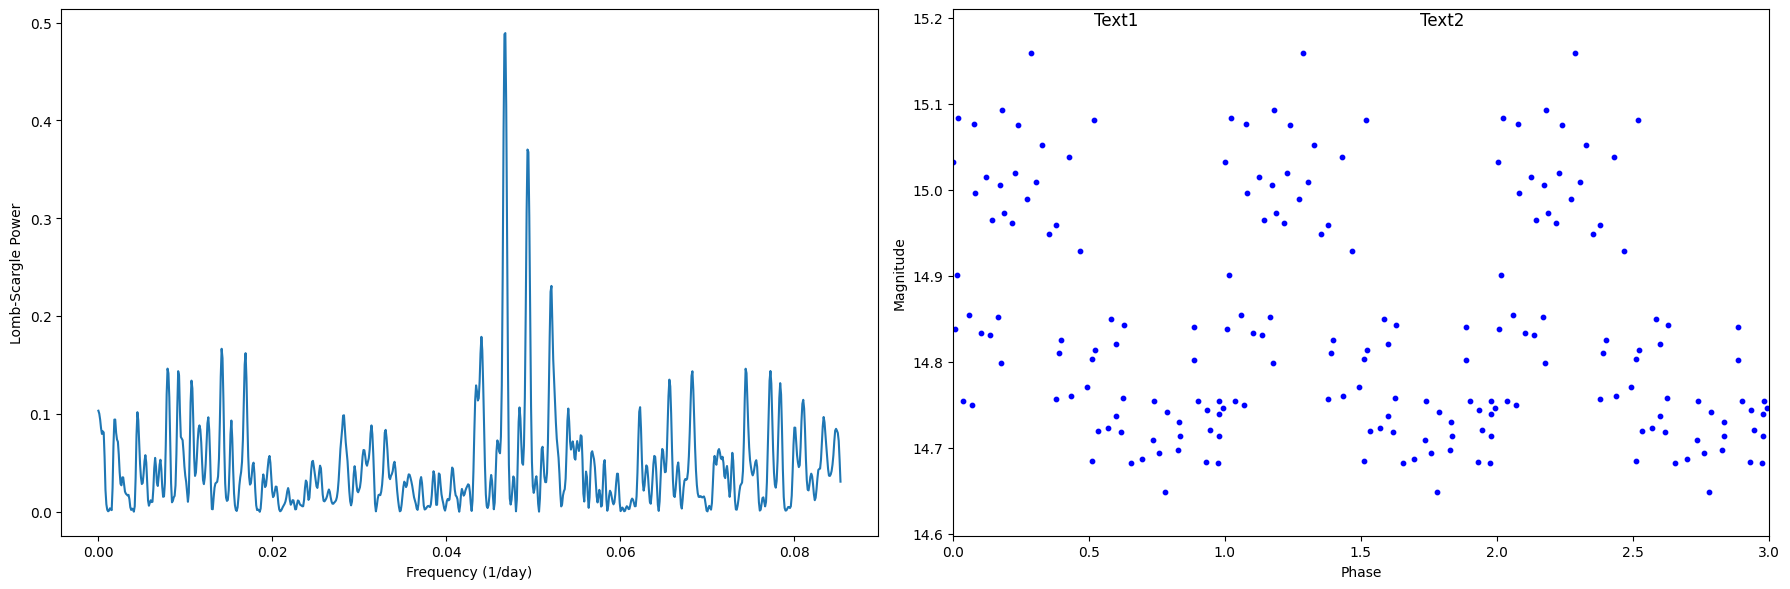

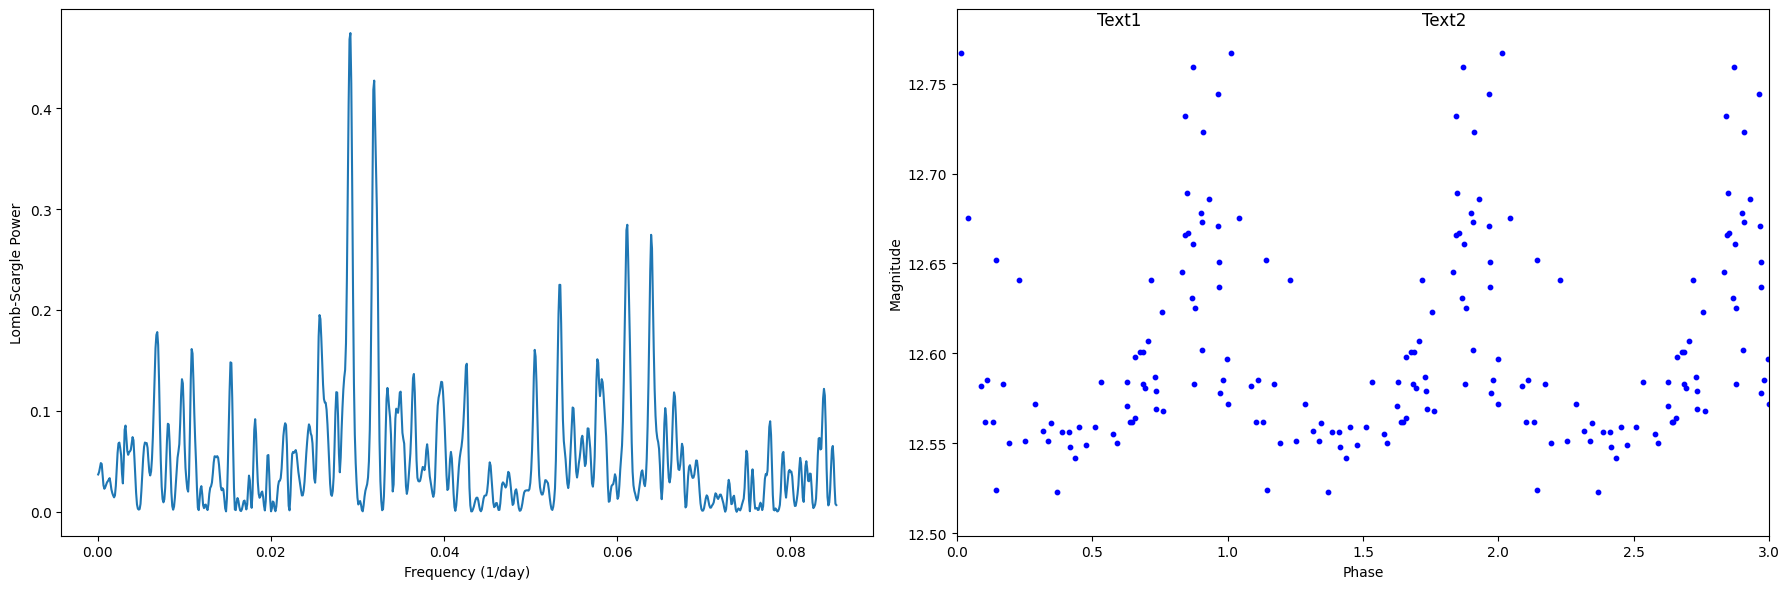

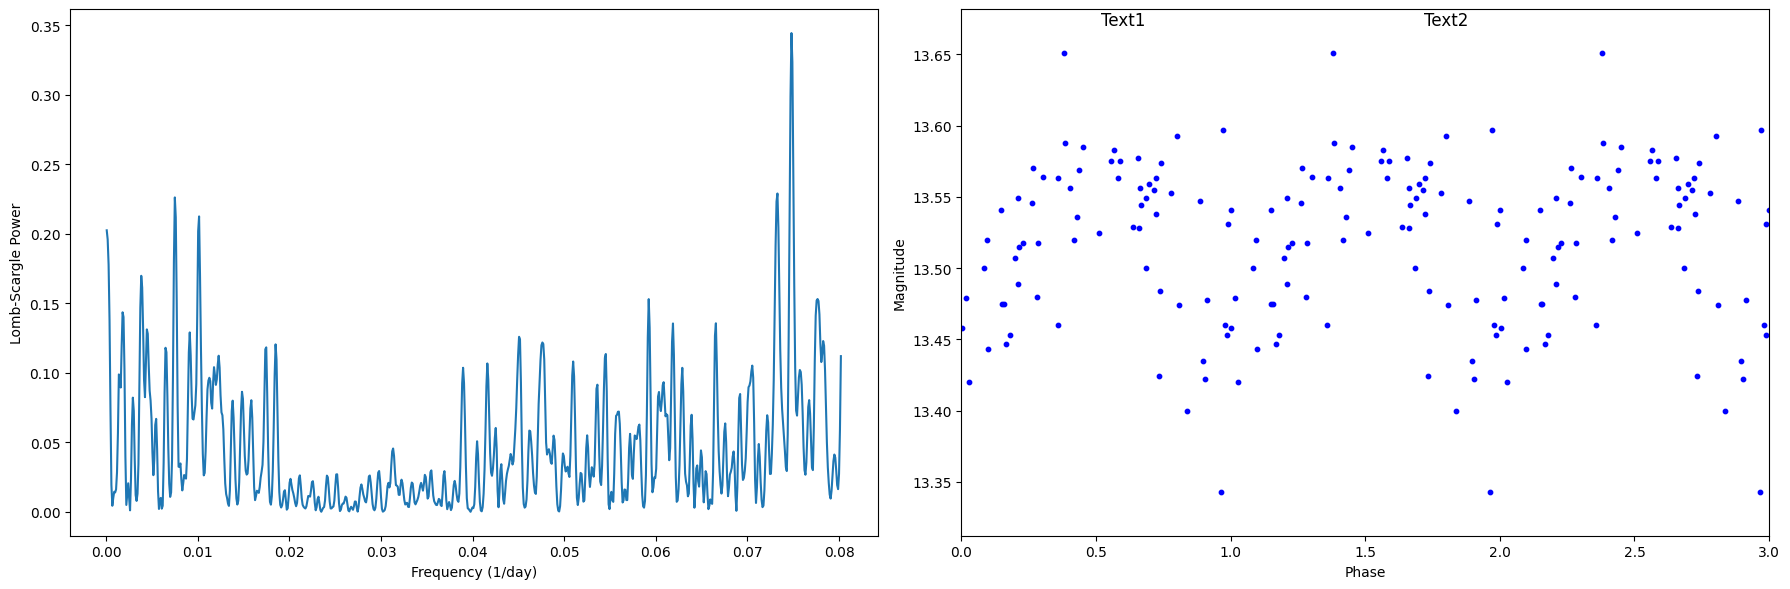

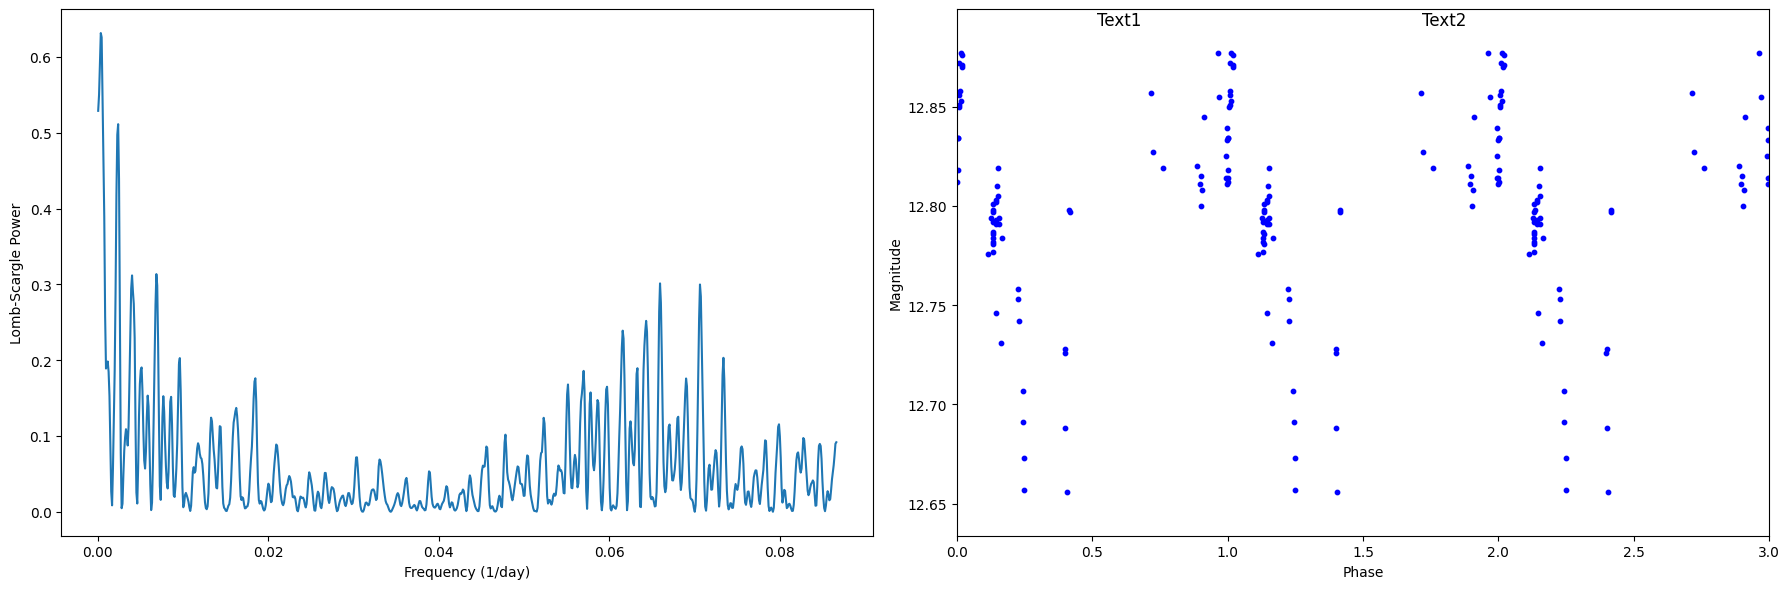

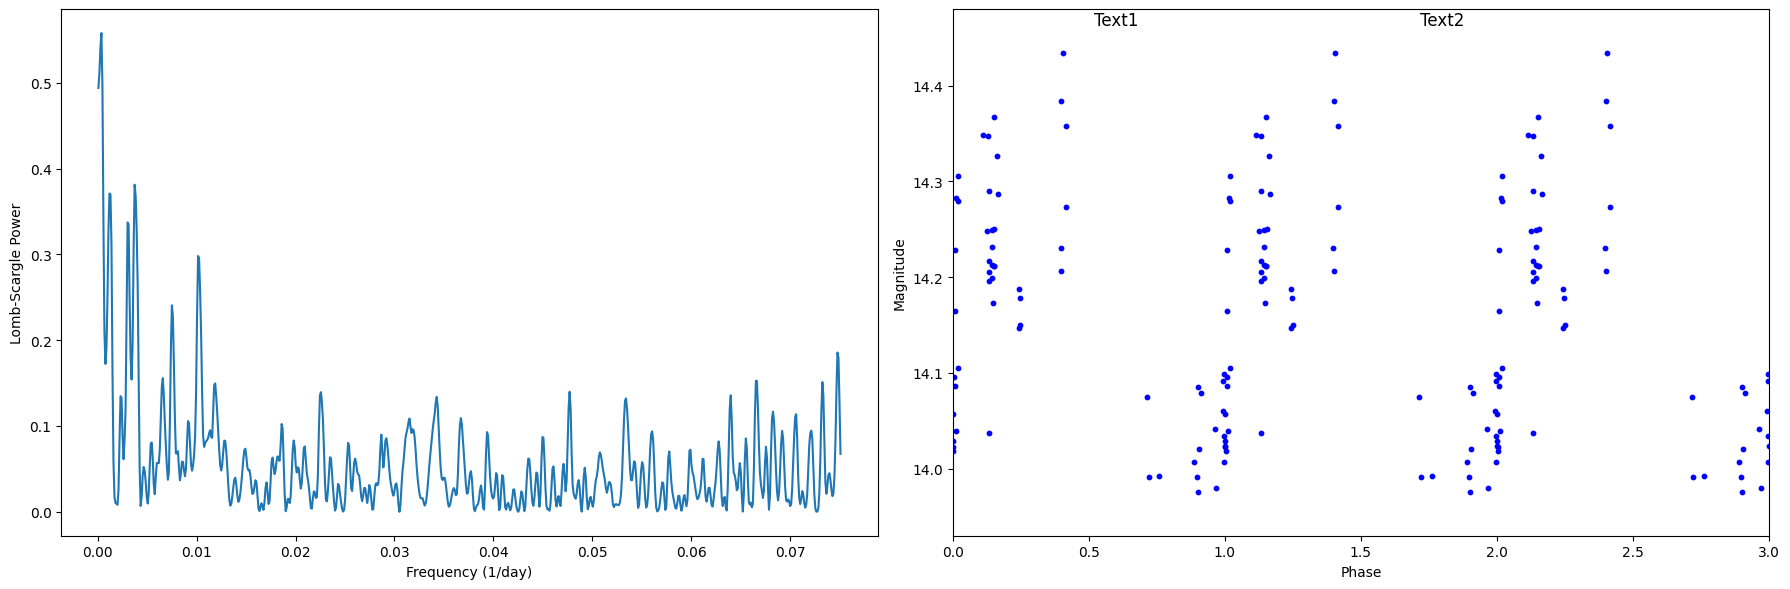

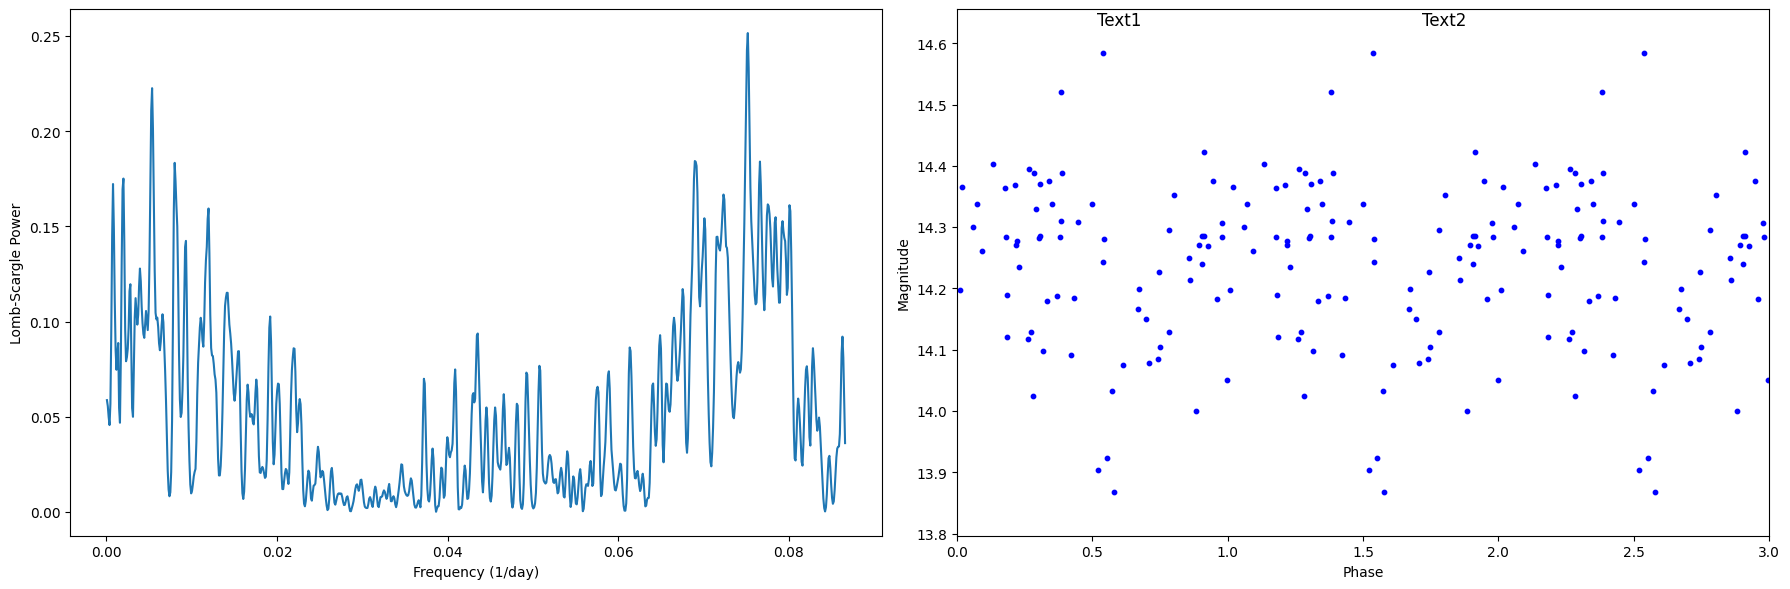

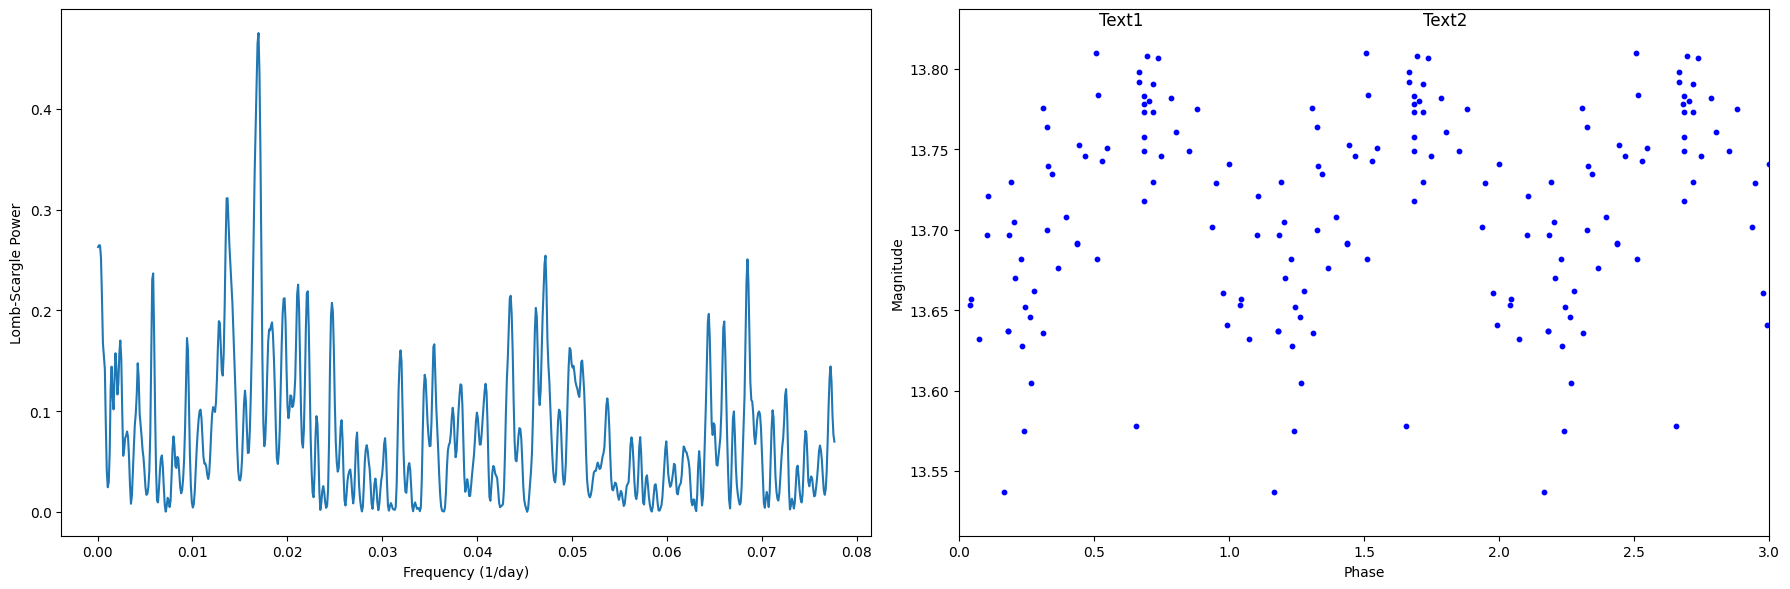

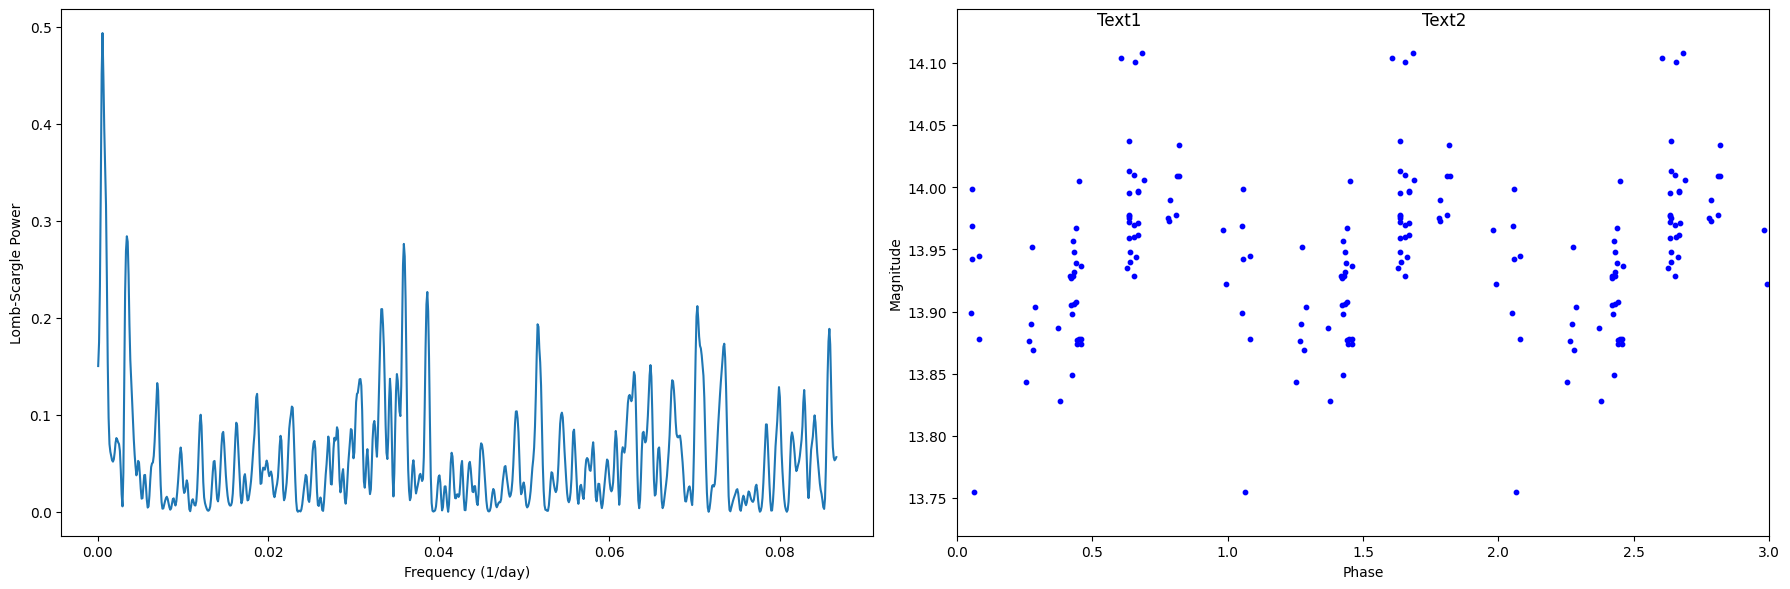

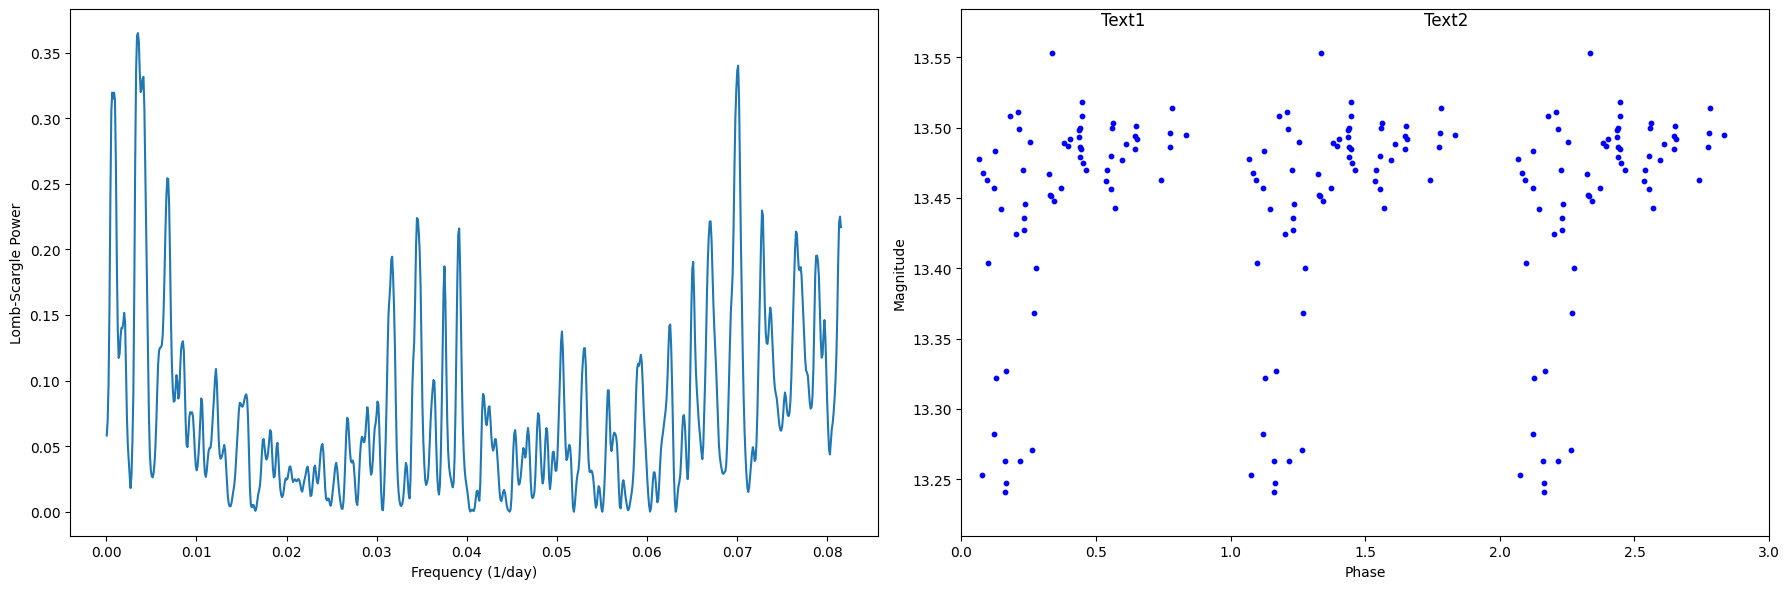

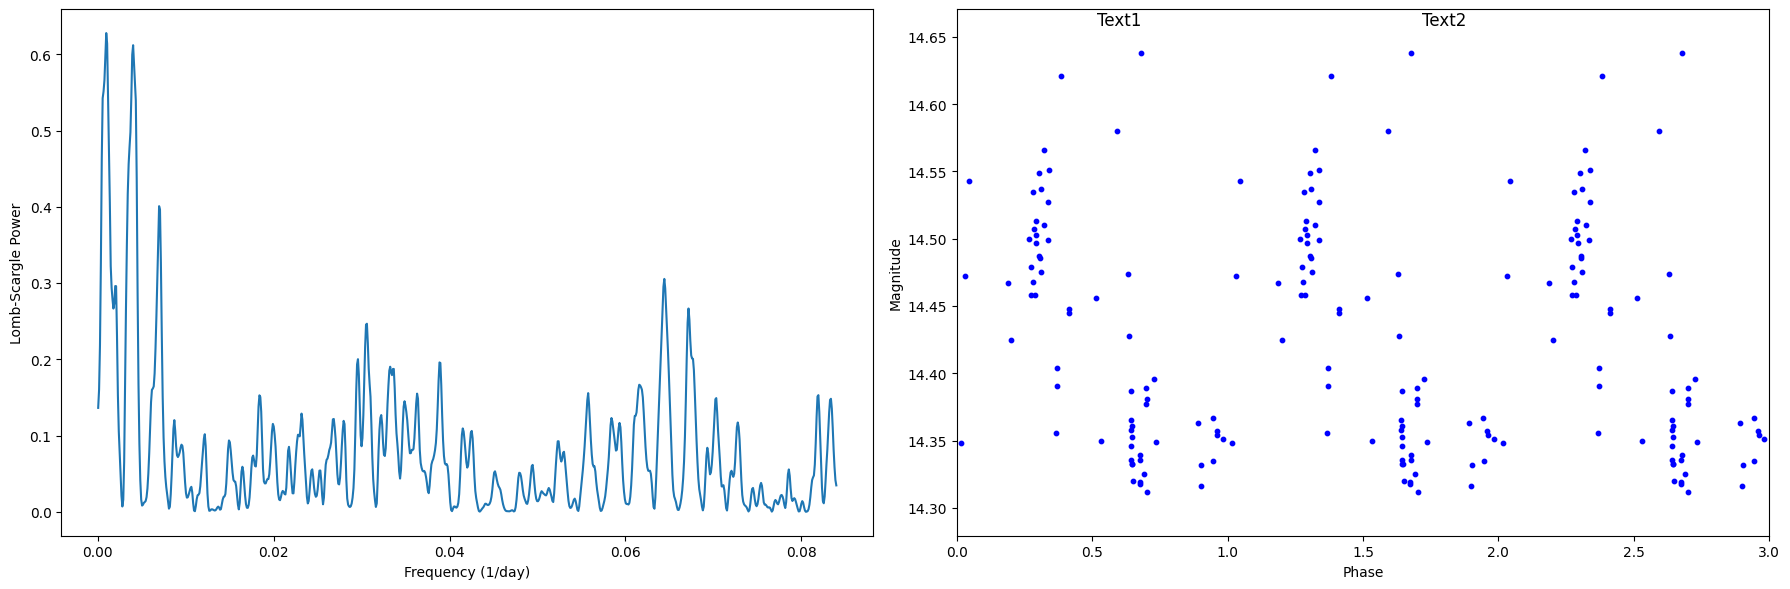

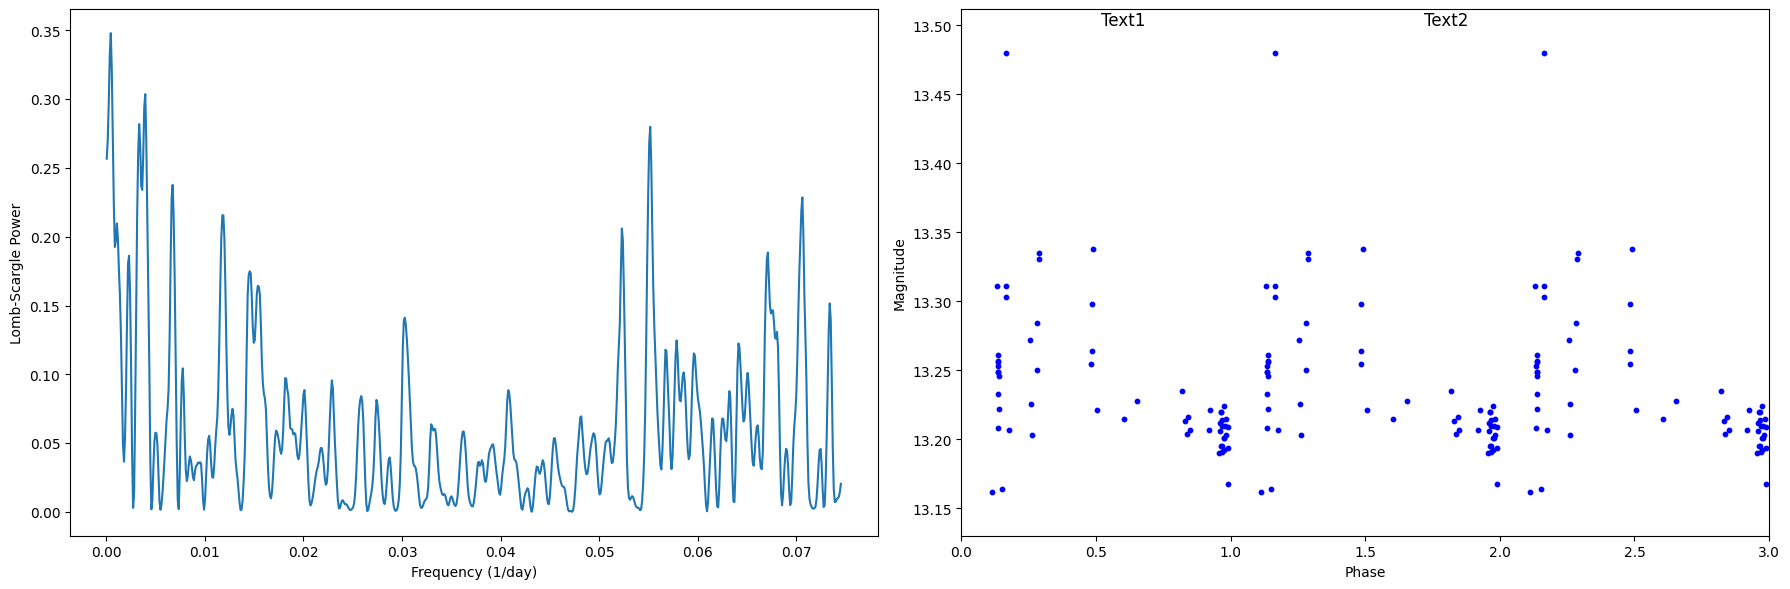

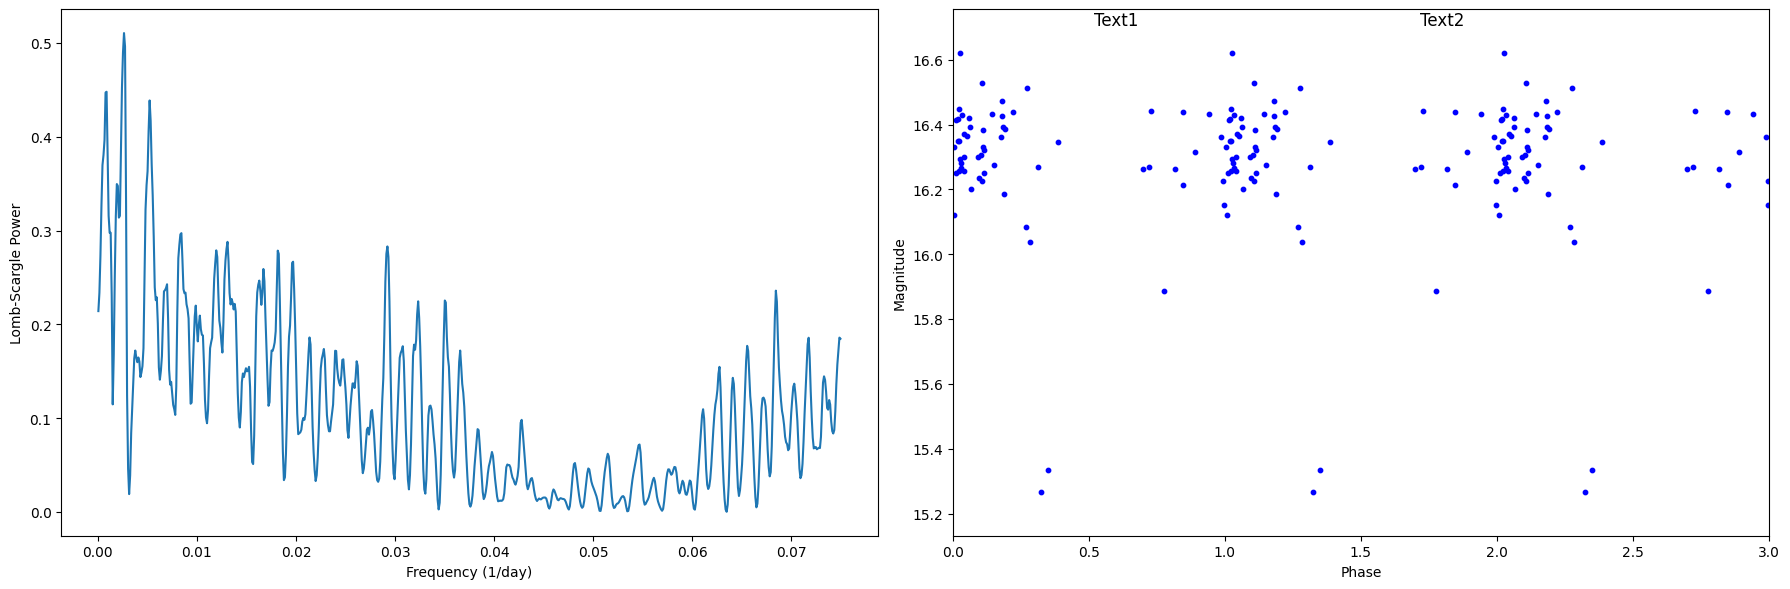

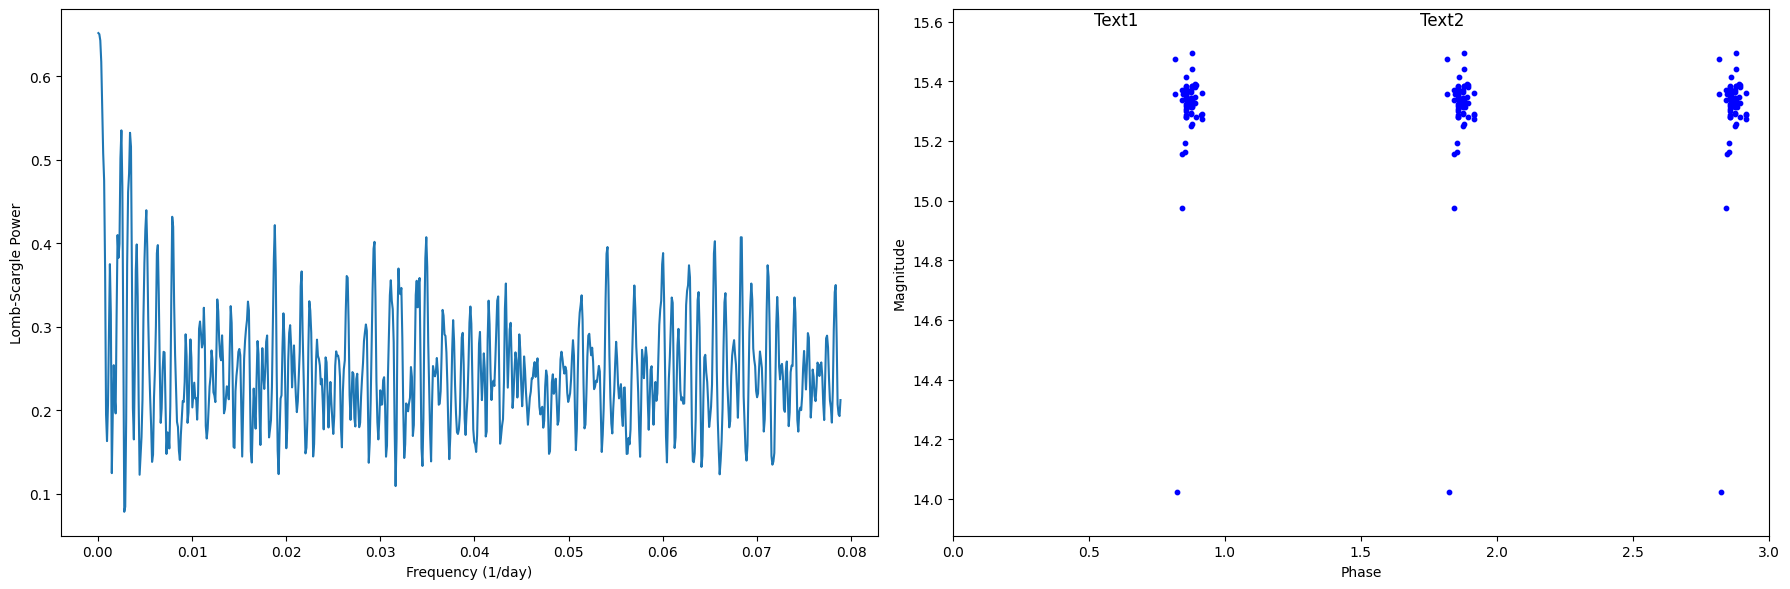

In [17]:
for star_df in most_probable_stars_dfs:
    plot_lombscargle_and_phase_diagram(star_df, frequency_threshold=0 ,n_phases=3)

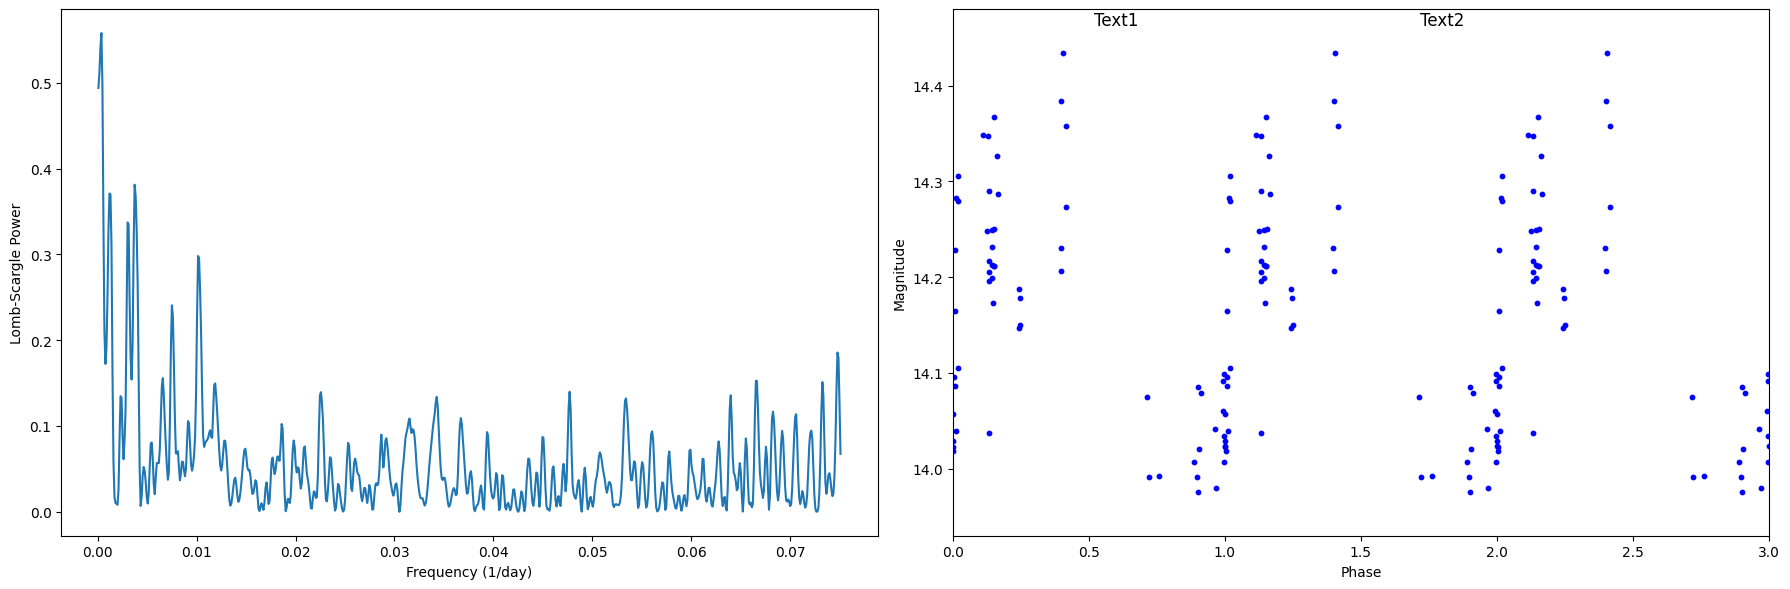

(0.00035645107142699434, 2805.4341259142843)

In [18]:
plot_lombscargle_and_phase_diagram(most_probable_stars_dfs[4], frequency_threshold=0 ,n_phases=3)

In [19]:
import pandas as pd

Tiempos = []
Intensidad = []
Error = []

for df in most_probable_stars_dfs:
    tiempos = df['MJD'].values
    intensidad = df['Magnitude'].values
    error = df['Error'].values

    Tiempos.append(tiempos)
    Intensidad.append(intensidad)
    Error.append(error)


In [20]:
def phi(t,t0,p):
    return (((t-t0)/p)-int((t-t0)/p))

In [56]:
Frecuencias=[]
Power=[]
Fap=[]
Periodo=[]
for i in range(13):
    frecuency=np.linspace(1/50,1/(0.05),100000)
    power = LombScargle(Tiempos[i], Intensidad[i], Error[i]).power(frecuency)
    max_power = power.max()
    fap = LombScargle(Tiempos[i], Intensidad[i], Error[i]).false_alarm_probability(max_power)
    Frecuencias.append(frecuency)
    Power.append(power)
    Fap.append(fap)

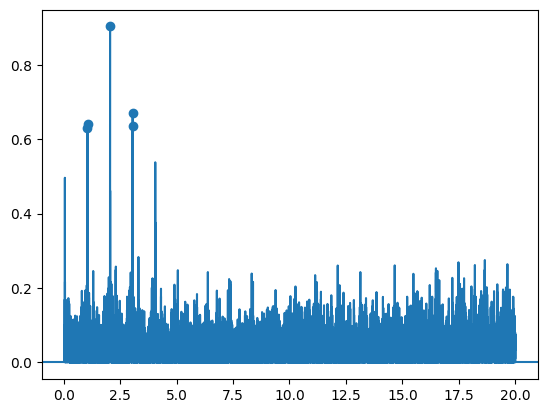

In [22]:
from scipy.signal import find_peaks

plt.plot(Frecuencias[0],Power[0])
plt.axhline(Fap[0])
peaks, _ = find_peaks(Power[0])

powerpeaks=Power[0][peaks]
power_order=np.sort(powerpeaks)[::-1]
n_peaks=5
ind_peaks=[]
Freq_peaks=[]
Power_peaks=[]
Periodo_peaks=[]
i=0
while(i<n_peaks):
    ind_peaks=np.where(Power[0]==power_order[i])[0][0]
    Freq_peaks.append(Frecuencias[0][ind_peaks])
    Periodo_peaks.append(1/Freq_peaks[-1])
    Power_peaks.append(Power[0][ind_peaks])
    i=i+1
plt.scatter(Freq_peaks,Power_peaks)

In [57]:
k = [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
pe_k = [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

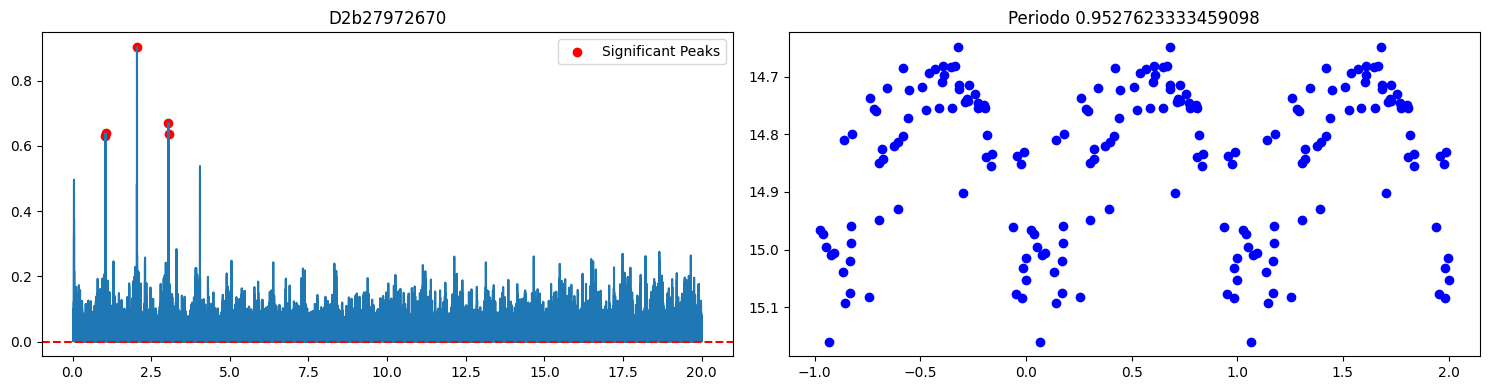

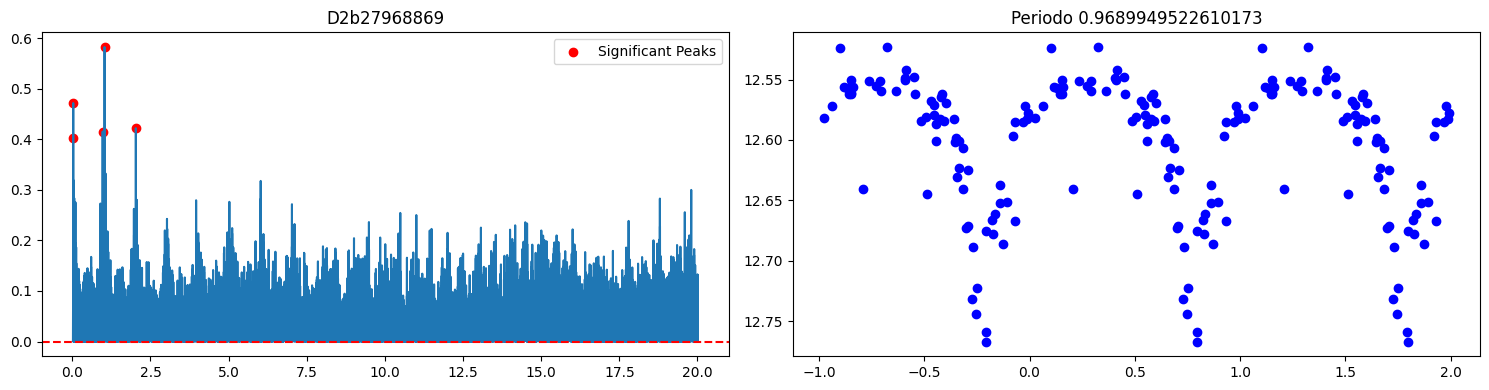

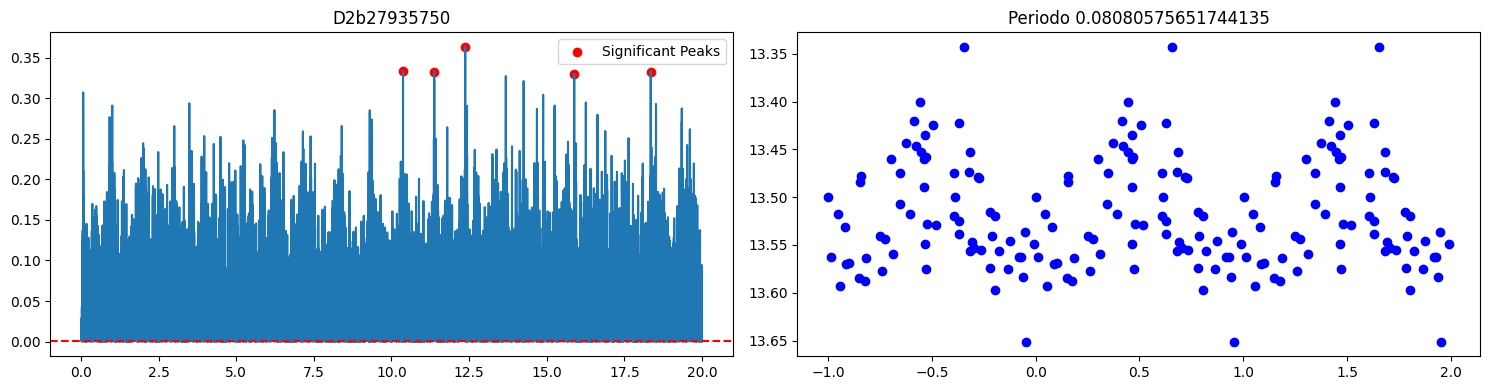

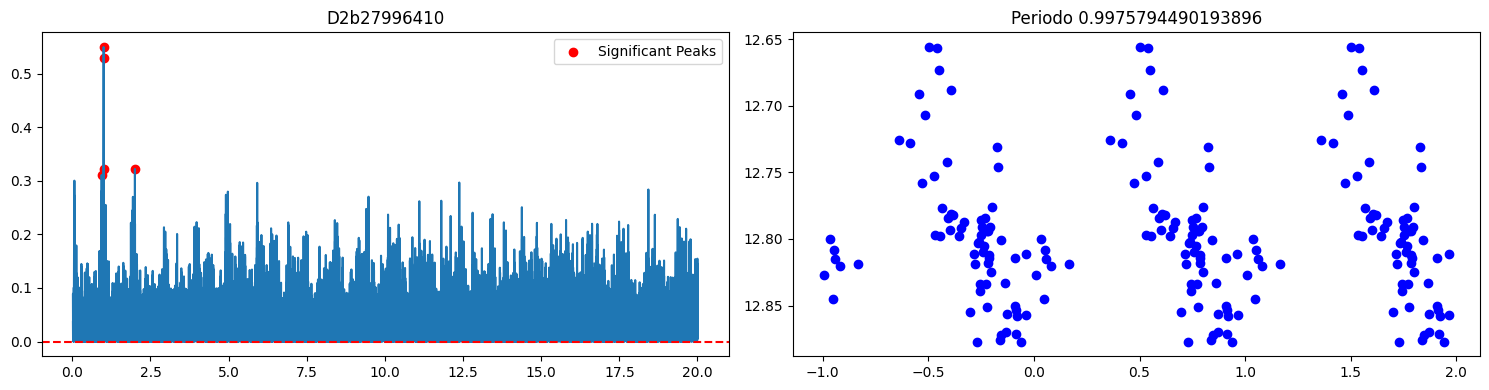

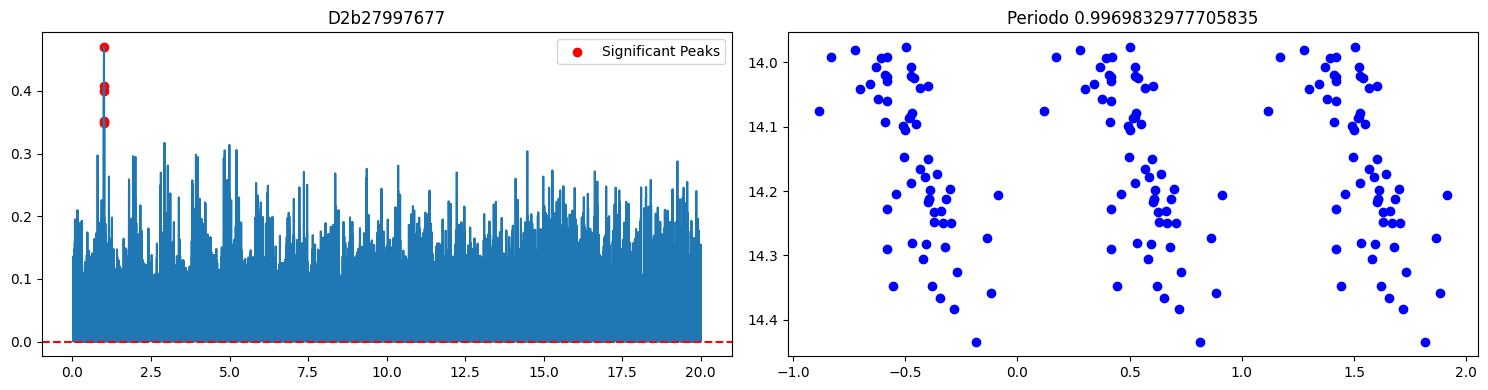

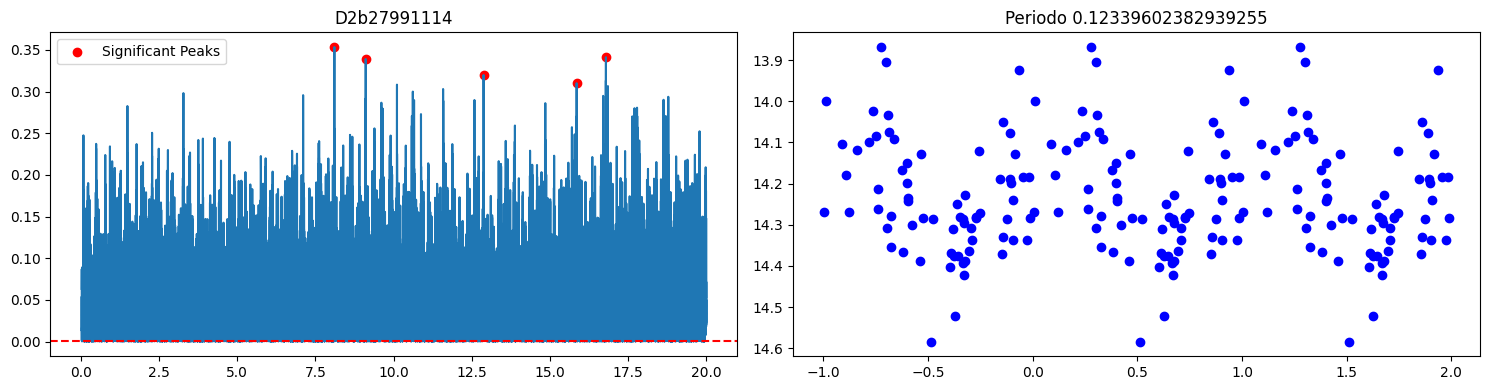

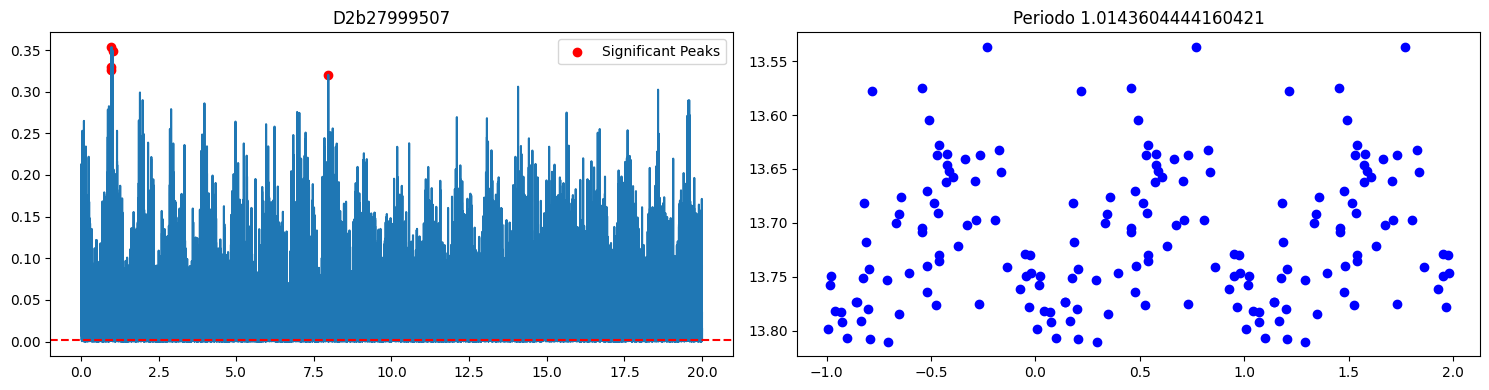

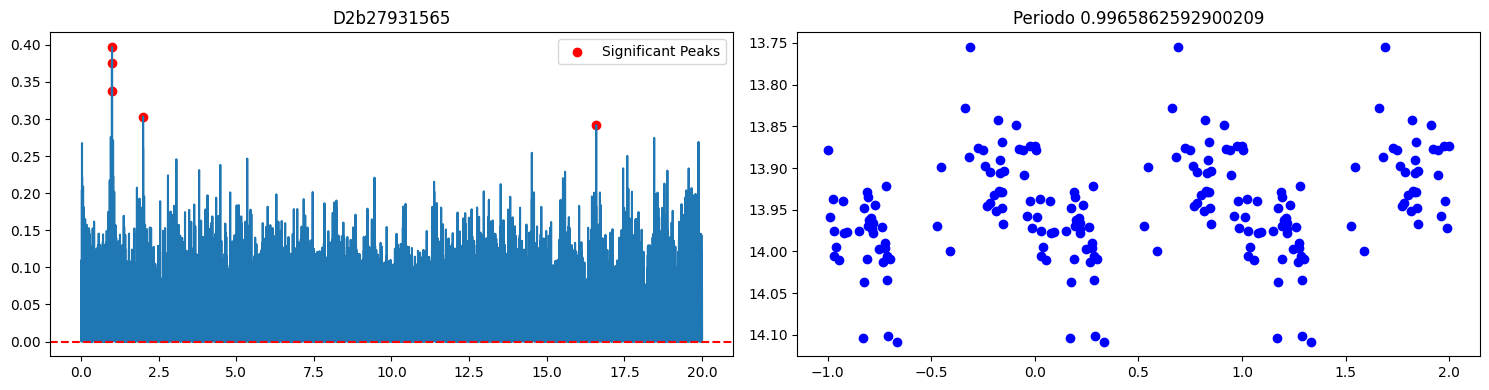

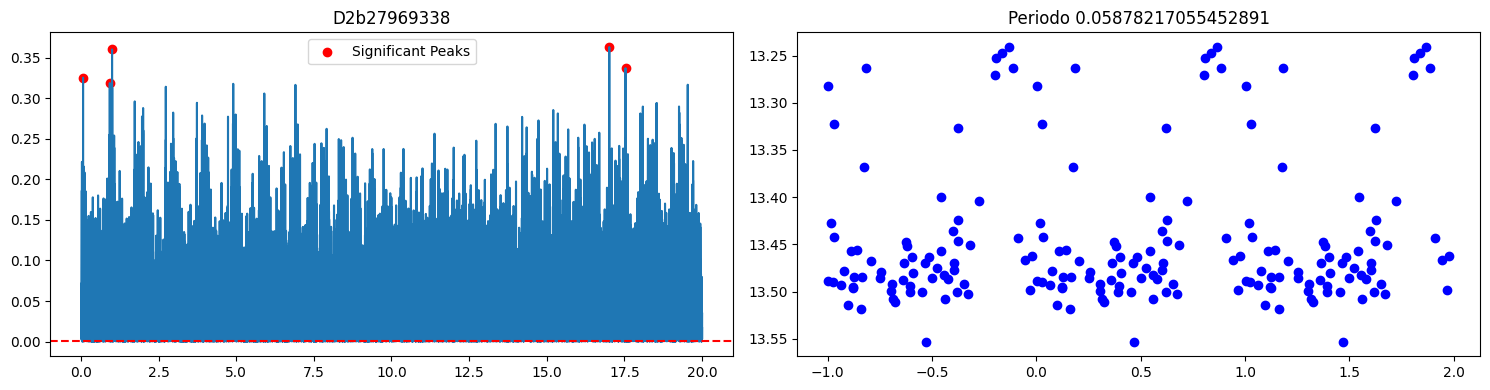

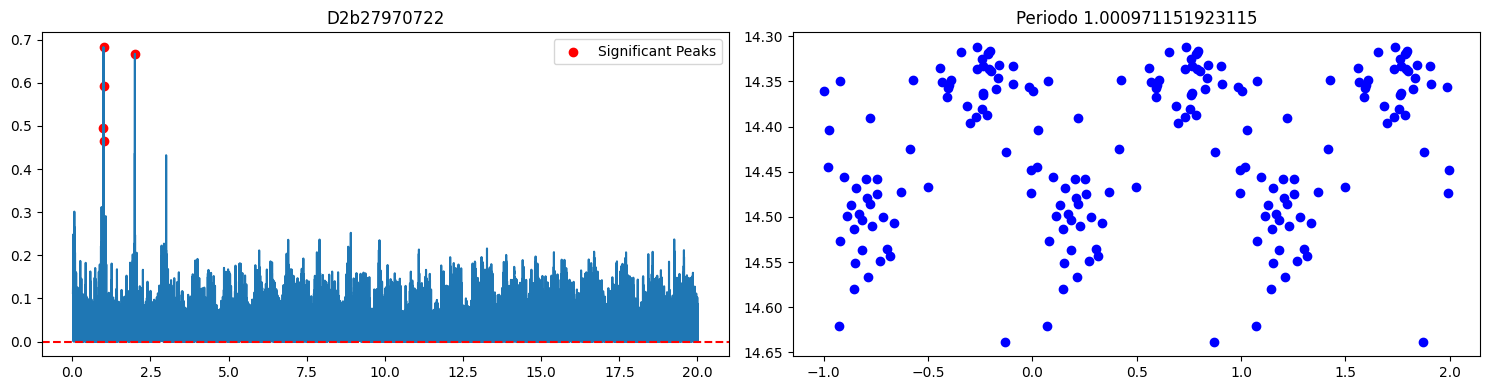

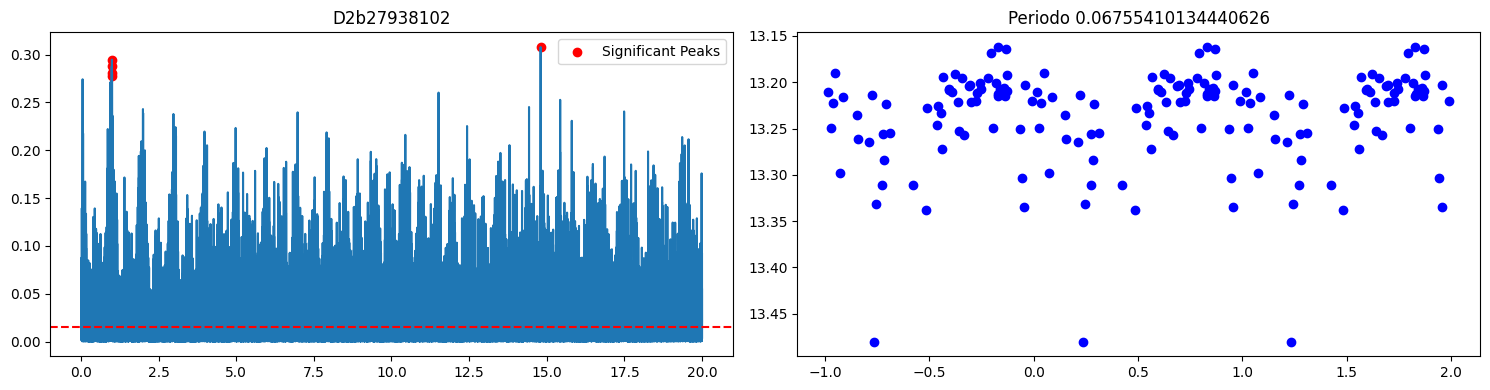

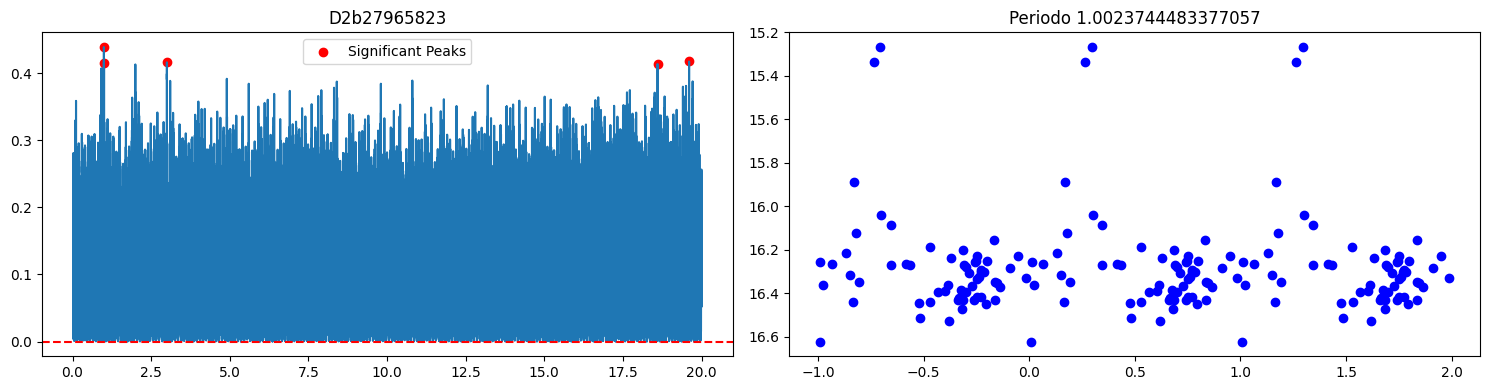

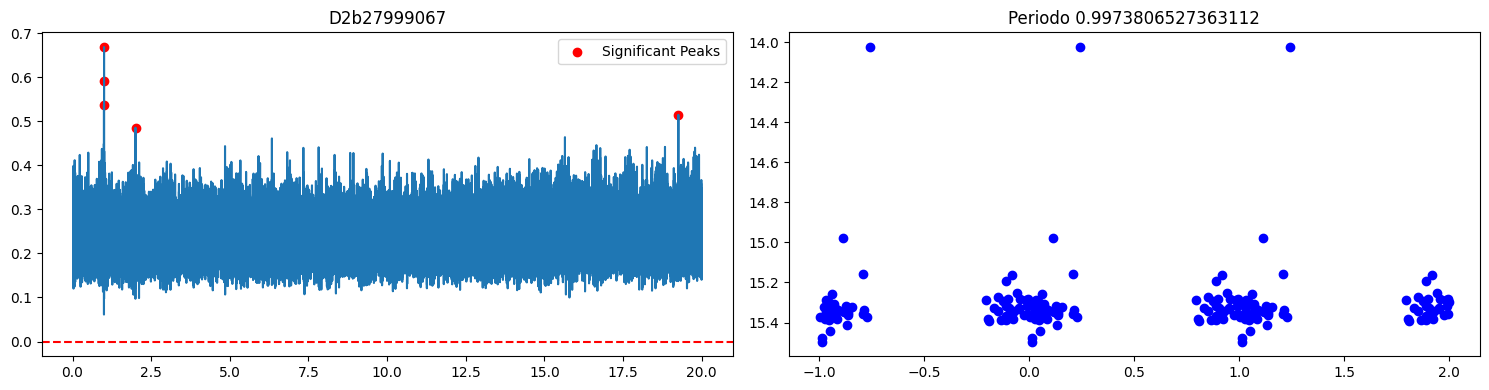

In [58]:
for i_freq, Frecuencias in enumerate(Frecuencias):
    fig, axs = plt.subplots(1, 2, figsize=(15, 4))

    # Calculate Lomb-Scargle periodogram
    ls = LombScargle(Tiempos[i_freq], Intensidad[i_freq], Error[i_freq])
    frequencies = np.linspace(1/50, 1/0.05, 100000)
    power = ls.power(frequencies)
    fap = ls.false_alarm_probability(power.max())

    # Plot periodogram and mark significant peaks
    axs[0].plot(frequencies, power)
    axs[0].axhline(fap, color='r', linestyle='--')
    peaks, _ = find_peaks(power)
    sorted_peaks = sorted(peaks, key=lambda x: power[x], reverse=True)[:n_peaks]
    peak_frequencies = frequencies[sorted_peaks]
    peak_powers = power[sorted_peaks]
    axs[0].scatter(peak_frequencies, peak_powers, color='r', label='Significant Peaks')
    axs[0].set_title(most_probable_stars_dfs[i_freq].attrs['ID_star'])

    # Plot phased light curves for selected periods
    if k[i_freq] < len(peak_frequencies):  # Ensure valid index
        period = 1 / peak_frequencies[k[i_freq]]
        phase = (Tiempos[i_freq] % period) / period

        # Plot phased light curves
        axs[1].scatter(phase, Intensidad[i_freq], c="b")
        axs[1].scatter(phase + 1, Intensidad[i_freq], c="b")  # Wrap-around plot
        axs[1].scatter(phase - 1, Intensidad[i_freq], c="b")  # Wrap-around plot
        axs[1].set_title(f'Periodo {period}')
        axs[1].invert_yaxis()

    axs[0].legend()
    plt.tight_layout()
    plt.show()
